# Data Science Salaries 2024 - EDA Universidade dos Dados

## Preparação e Tratamento dos Dados

Essa é a etapa inicial da Análise Exploratória de Dados. O objetivo aqui é preparar a base para a estapa de análises e visualização de dados. As análises serão realizadas no Excel, dada o tamanho da base de dados, o software atende bem as necessidade dessa analise.

### Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mode
import warnings 
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### Leitura dos dados

In [2]:
# Carregando o df

df = pd.read_excel('data_science_salaries.xlsx')

### Exploração inicial dos dados

In [3]:
# Primeiras 5 linhas do df

df.head()

,job_title,experience_level,employment_type,work_models,work_year,employee_residence,salary,salary_currency,salary_in_usd,company_location,company_size
0,Data Engineer,Mid-level,Full-time,Remote,2024,United States,148100,USD,148100,United States,Medium
1,Data Engineer,Mid-level,Full-time,Remote,2024,United States,98700,USD,98700,United States,Medium
2,Data Scientist,Senior-level,Full-time,Remote,2024,United States,140032,USD,140032,United States,Medium
3,Data Scientist,Senior-level,Full-time,Remote,2024,United States,100022,USD,100022,United States,Medium
4,BI Developer,Mid-level,Full-time,On-site,2024,United States,120000,USD,120000,United States,Medium


In [4]:
# Ultimas 5 linhas do df 

df.tail()

,job_title,experience_level,employment_type,work_models,work_year,employee_residence,salary,salary_currency,salary_in_usd,company_location,company_size
6594,Staff Data Analyst,Entry-level,Contract,Hybrid,2020,Canada,60000,CAD,44753,Canada,Large
6595,Staff Data Analyst,Executive-level,Full-time,On-site,2020,Nigeria,15000,USD,15000,Canada,Medium
6596,Machine Learning Manager,Senior-level,Full-time,Hybrid,2020,Canada,157000,CAD,117104,Canada,Large
6597,Data Engineer,Mid-level,Full-time,Hybrid,2020,Austria,65000,EUR,74130,Austria,Large
6598,Data Scientist,Senior-level,Full-time,On-site,2020,Austria,80000,EUR,91237,Austria,Small


In [5]:
# Dimensão do df

linhas = df.shape[0]
colunas = df.shape[1]

print(f'O df tem tem {linhas} linhas e {colunas} colunas.')


O df tem tem 6599 linhas e 11 colunas.


In [6]:
# Informações gerais do df

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6599 entries, 0 to 6598
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   job_title           6599 non-null   object
 1   experience_level    6599 non-null   object
 2   employment_type     6599 non-null   object
 3   work_models         6599 non-null   object
 4   work_year           6599 non-null   int64 
 5   employee_residence  6599 non-null   object
 6   salary              6599 non-null   int64 
 7   salary_currency     6599 non-null   object
 8   salary_in_usd       6599 non-null   int64 
 9   company_location    6599 non-null   object
 10  company_size        6599 non-null   object
dtypes: int64(3), object(8)
memory usage: 567.2+ KB


O df tem um total de 6599 linhas. Os tipos de dados de todas as variáveis está correto. Vamos seguir com as próximas etapas.

### Verificar valores

In [7]:
# Verificar valores nulos

df.isnull().sum()

job_title             0
experience_level      0
employment_type       0
work_models           0
work_year             0
employee_residence    0
salary                0
salary_currency       0
salary_in_usd         0
company_location      0
company_size          0
dtype: int64

O df não contém valores nulos.

In [8]:
# Verificar valores duplicados

df.duplicated().any()

False

O df não contém valores duplicados.

In [9]:
# Verificar quantidade de elementos unicos de cada variável

df.nunique()

job_title              132
experience_level         4
employment_type          4
work_models              3
work_year                5
employee_residence      87
salary                1833
salary_currency         22
salary_in_usd         2147
company_location        75
company_size             3
dtype: int64

Ao analisar a quantidade de valores unicos de variáveis categóricas, notamos que há muitas categorias. Um exemplo é a variavel 'job_title' que possui 132 valores unicos. Isso dificulta um pouco na interpretação de analises, além de que pode haver categorias redundantes. Vamos exporar melhor essa categoria para realizarmos o tratamento adequado.

In [10]:
# Verificar distribuição dos valores da variável job_title

freq_abs = df['job_title'].value_counts()
freq_cum = df['job_title'].value_counts().cumsum().sort_values(ascending=True)
freq_rel = df['job_title'].value_counts(normalize=True) * 100
freq_cum_rel = df['job_title'].value_counts(normalize=True).cumsum() * 100

tab_job_title = pd.DataFrame({
    
    'Frequência Absoluta': freq_abs,
    'Frequência Cumulativa': freq_cum,
    '% Frequência Relativa': freq_rel,
    '% Freq. Acumulada Relativa': freq_cum_rel

}).round(2)

tab_job_title

,Frequência Absoluta,Frequência Cumulativa,% Frequência Relativa,% Freq. Acumulada Relativa
job_title,,,,
Data Engineer,1307,1307,19.81,19.81
Data Scientist,1243,2550,18.84,38.64
Data Analyst,910,3460,13.79,52.43
Machine Learning Engineer,629,4089,9.53,61.96
Analytics Engineer,246,4335,3.73,65.69
Research Scientist,206,4541,3.12,68.81
Data Architect,176,4717,2.67,71.48
Research Engineer,136,4853,2.06,73.54
ML Engineer,113,4966,1.71,75.25


Dos 132 cargos, 13 cargos ocupam **80.38 %** dos dados. Ou seja, quase toda a base se concentra nesses cargos.

Para uma melhor análise dessa categoria, vou utilizar o ChatGPT para agrupar os valores reduntantes/semelhantes e rotular adequadamente os grupos. Vou criar uma nova variável a partir dos agrupamentos.

Mas antes, tem uma coisa curiosa nessa base de dados. Existe um cargo com o nome de 'Autonomous Vehicle Technician'. Esse cargo corresponde a um Técnico em Veículos Autônomos. A partir de uma rápida pesquisa sobre esse job, eu entendo que esse cargo é de algum profissional da engenharia automotiva que aplica conceitos de inteligência artificial na sua profissão. Portanto, decidi manter esse cargo na base.

In [11]:
# Selecionando o job atípico 

df.loc[df['job_title'] == 'Autonomous Vehicle Technician']


,job_title,experience_level,employment_type,work_models,work_year,employee_residence,salary,salary_currency,salary_in_usd,company_location,company_size
4815,Autonomous Vehicle Technician,Mid-level,Full-time,Hybrid,2023,United Kingdom,120000,USD,120000,United Kingdom,Medium
6520,Autonomous Vehicle Technician,Mid-level,Freelance,Hybrid,2021,American Samoa,45555,USD,45555,Bahamas,Medium


Esse é o agrupamento feito pelo ChatGPT:

**Data Scientist:**

Data Scientist
Senior Data Scientist
Director of Data Science
Data Science Manager
Applied Scientist
Research Scientist
Managing Director Data Science
Data Science Practitioner
Data Science Lead
Data Science Consultant
Data Science Director
Head of Data
Decision Scientist
Data Strategy Manager
Principal Data Scientist
Marketing Data Scientist
Financial Data Analyst
Principal Machine Learning Engineer
Lead Machine Learning Engineer
Lead Data Scientist
Applied Data Scientist
Staff Data Scientist
Insight Analyst
Marketing Data Analyst
AI Scientist


**Data Engineer:**

Data Engineer
Data Lead
Data Developer
ETL Developer
Data Integration Engineer
Data Management Analyst
Data Infrastructure Engineer
Data Operations Analyst
Data Operations Engineer
Compliance Data Analyst
AWS Data Architect
Cloud Data Engineer
Azure Data Engineer
Data Modeller
ETL Engineer
Big Data Architect
Data DevOps Engineer
Consultant Data Engineer
Cloud Data Architect

**Business Intelligence (BI) Analyst/Developer/Engineer/Manager:**

BI Developer
Business Intelligence Developer
Business Intelligence Analyst
Analytics Engineer
Business Intelligence Engineer
BI Analyst
Business Data Analyst
Business Intelligence Manager
Business Intelligence Data Analyst
Power BI Developer

**Research/Analytics Scientist/Analyst/Engineer:**

Research Analyst
Analytics Engineer
Research Scientist
Research Engineer
Analytics Specialist
Machine Learning Researcher
Deep Learning Researcher
Analytics Engineering Manager
Data Analytics Consultant
Data Analytics Engineer

**Machine Learning (ML) Engineer/Scientist/Developer/Manager:**

MLOps Engineer
Machine Learning Scientist
Machine Learning Engineer
AI Engineer
ML Engineer
Machine Learning Infrastructure Engineer
Machine Learning Operations Engineer
NLP Engineer
Machine Learning Researcher
Machine Learning Modeler
AI Architect
Machine Learning Software Engineer
Head of Machine Learning
Machine Learning Manager
AI Research Engineer
Deep Learning Engineer
Machine Learning Developer
Staff Machine Learning Engineer
Lead Machine Learning Engineer
Principal Machine Learning Engineer
AI Developer
Applied Machine Learning Engineer
Applied Machine Learning Scientist
AI Product Manager
Lead Machine Learning Engineer
Autonomous Vehicle Technician

**Data Analyst:**

Data Analyst
Data Quality Analyst
Lead Data Analyst
BI Data Analyst
Finance Data Analyst
Product Data Analyst
Marketing Data Analyst
Sales Data Analyst

**Data Manager/Lead/Specialist/Architect/Consultant/Strategist:**

Director of Data Science
Managing Director Data Science
Data Manager
Head of Data
Data Specialist
Data Architect
Data Visualization Specialist
Data Science Manager
Data Product Manager
Data Strategist
Data Quality Manager
Data Product Owner
Data Management Analyst
Data Integration Specialist
Data Management Specialist
Data Quality Engineer
Data Operations Manager
Data Operations Specialist
Data Visualization Analyst
Data Modeller
Manager Data Management
Data Science Tech Lead
Lead Data Analyst
Lead Data Engineer
Principal Data Analyst
Staff Data Analyst
Staff Data Scientist

**NLP Engineer:**

Prompt Engineer

**Cloud/Data Operations Engineer/Manager/Specialist:**

Data Integration Engineer
Data Operations Analyst
Data Operations Engineer
Data Operations Manager
Cloud Database Engineer
Cloud Data Engineer


In [12]:
# Dicionário com os grupos e suas categorias correspondentes

grupos = {
    'Data Scientist': ['Data Science', 'Data Science Engineer', 'Data Scientist', 'Senior Data Scientist', 'Director of Data Science', 'Data Science Manager',
                       'Applied Scientist', 'Research Scientist', 'Managing Director Data Science', 'Data Science Practitioner',
                       'Data Science Lead', 'Data Science Consultant', 'Data Science Director', 'Head of Data', 'Decision Scientist',
                       'Data Strategy Manager', 'Principal Data Scientist', 'Marketing Data Scientist', 'Financial Data Analyst',
                       'Principal Machine Learning Engineer', 'Lead Machine Learning Engineer', 'Lead Data Scientist',
                       'Applied Data Scientist', 'Staff Data Scientist', 'Insight Analyst', 'Marketing Data Analyst', 'AI Scientist'],
    
    'Data Engineer': ['Data Engineer', 'Data Lead', 'Data Developer', 'ETL Developer', 'Data Integration Engineer',
                      'Data Management Analyst', 'Data Infrastructure Engineer', 'Data Operations Analyst',
                      'Data Operations Engineer', 'Compliance Data Analyst', 'AWS Data Architect', 'Cloud Data Engineer',
                      'Azure Data Engineer','Computer Vision Engineer', 'Data Modeler', 'Software Data Engineer', 'Big Data Engineer', 'Principal Data Engineer', 'Computer Vision Software Engineer', 'Principal Data Architect', 'Marketing Data Engineer', 'Data Modeller', 'ETL Engineer', 'Big Data Architect', 'Data DevOps Engineer', 'Consultant Data Engineer', 'Cloud Data Architect'],
    
    'Business Intelligence': ['BI Developer', 'Business Intelligence Specialist', 'Data Visualization Engineer', 'BI Data Engineer', 'Business Intelligence Developer',
                                                                      'Business Intelligence Analyst', 'Analytics Engineer',
                                                                      'Business Intelligence Engineer', 'BI Analyst',
                                                                      'Business Data Analyst', 'Business Intelligence Manager',
                                                                      'Business Intelligence Data Analyst', 'Power BI Developer', 'BI Data Analyst'],
    
    'Research/Analytics Scientist/Analyst/Engineer': ['Research Analyst', 'Analytics Engineer', 'Research Scientist',
                                                      'Research Engineer', 'Analytics Specialist', 'Machine Learning Researcher',
                                                      'Deep Learning Researcher', 'Analytics Engineering Manager',
                                                      'Data Analytics Consultant', 'Data Analytics Engineer'],
    
    'Machine Learning': ['MLOps Engineer', 'Machine Learning Scientist',
                                                                   'Machine Learning Engineer', 'Autonomous Vehicle Technician', 'AI Engineer', 'ML Engineer',
                                                                   'Machine Learning Infrastructure Engineer',
                                                                   'Machine Learning Operations Engineer', 'NLP Engineer',
                                                                   'Machine Learning Researcher', 'Machine Learning Modeler',
                                                                   'AI Architect', 'Machine Learning Software Engineer',
                                                                   'Head of Machine Learning', 'Machine Learning Manager',
                                                                   'AI Research Engineer', 'Deep Learning Engineer',
                                                                   'Machine Learning Developer', 'Staff Machine Learning Engineer',
                                                                   'Lead Machine Learning Engineer', 'Principal Machine Learning Engineer',
                                                                   'AI Developer', 'Applied Machine Learning Engineer',
                                                                   'Applied Machine Learning Scientist', 'AI Product Manager','Prompt Engineer', 'Machine Learning Research Engineer', 'AI Programmer'],
    
    'Data Analyst': ['Data Analyst', 'Data Quality Analyst', 'Lead Data Analyst', 'Finance Data Analyst',
                     'Product Data Analyst', 'Marketing Data Analyst', 'Sales Data Analyst'],
    
    'Data Manager/Lead/Specialist': ['Director of Data Science', 'Data Analytics Manager', 'Head of Data Science', 'Data Analyst Lead', 'Data Scientist Lead', 'Managing Director Data Science',
                                                                    'Data Manager', 'Head of Data', 'Data Specialist',
                                                                    'Data Architect', 'Data Visualization Specialist',
                                                                    'Data Science Manager', 'Data Product Manager', 'Data Strategist',
                                                                    'Data Quality Manager', 'Data Product Owner', 'Data Management Analyst',
                                                                    'Data Integration Specialist', 'Data Management Specialist',
                                                                    'Data Quality Engineer', 'Data Operations Manager',
                                                                    'Data Operations Specialist', 'Data Visualization Analyst',
                                                                    'Data Modeller', 'Manager Data Management',
                                                                    'Data Science Tech Lead', 'Lead Data Analyst',
                                                                    'Lead Data Engineer', 'Principal Data Analyst',
                                                                    'Staff Data Analyst', 'Staff Data Scientist', 'Data Analytics Specialist', 'Machine Learning Specialist', 'Data Analytics Lead'],
    'Cloud/Data Operations': ['Data Integration Engineer', 'Data Operations Analyst',
                                                         'Data Operations Engineer', 'Data Operations Manager',
                                                         'Cloud Database Engineer', 'Cloud Data Engineer']
}

# Função para agrupar as categorias
def categorias_grupos(job_title):
    for group, titles in grupos.items():
        if job_title in titles:
            return group
    return 'Outros'  # Se não pertencer a nenhum grupo, definir como "Outros"

# Aplicando a função para criar a nova coluna 'job_title_grupo'
df['job_title_grupo'] = df['job_title'].apply(categorias_grupos)

In [13]:
df['job_title_grupo'].unique()

array(['Data Engineer', 'Data Scientist', 'Business Intelligence',
       'Research/Analytics Scientist/Analyst/Engineer', 'Data Analyst',
       'Machine Learning', 'Data Manager/Lead/Specialist',
       'Cloud/Data Operations'], dtype=object)

In [14]:
df.head()

,job_title,experience_level,employment_type,work_models,work_year,employee_residence,salary,salary_currency,salary_in_usd,company_location,company_size,job_title_grupo
0,Data Engineer,Mid-level,Full-time,Remote,2024,United States,148100,USD,148100,United States,Medium,Data Engineer
1,Data Engineer,Mid-level,Full-time,Remote,2024,United States,98700,USD,98700,United States,Medium,Data Engineer
2,Data Scientist,Senior-level,Full-time,Remote,2024,United States,140032,USD,140032,United States,Medium,Data Scientist
3,Data Scientist,Senior-level,Full-time,Remote,2024,United States,100022,USD,100022,United States,Medium,Data Scientist
4,BI Developer,Mid-level,Full-time,On-site,2024,United States,120000,USD,120000,United States,Medium,Business Intelligence


In [15]:
df.tail()

,job_title,experience_level,employment_type,work_models,work_year,employee_residence,salary,salary_currency,salary_in_usd,company_location,company_size,job_title_grupo
6594,Staff Data Analyst,Entry-level,Contract,Hybrid,2020,Canada,60000,CAD,44753,Canada,Large,Data Manager/Lead/Specialist
6595,Staff Data Analyst,Executive-level,Full-time,On-site,2020,Nigeria,15000,USD,15000,Canada,Medium,Data Manager/Lead/Specialist
6596,Machine Learning Manager,Senior-level,Full-time,Hybrid,2020,Canada,157000,CAD,117104,Canada,Large,Machine Learning
6597,Data Engineer,Mid-level,Full-time,Hybrid,2020,Austria,65000,EUR,74130,Austria,Large,Data Engineer
6598,Data Scientist,Senior-level,Full-time,On-site,2020,Austria,80000,EUR,91237,Austria,Small,Data Scientist


Funcionou como esperado!

In [16]:
# Verificar distribuição dos valores da variável job_title_grupo

freq_abs = df['job_title_grupo'].value_counts()
freq_cum = df['job_title_grupo'].value_counts().cumsum().sort_values(ascending=True)
freq_rel = df['job_title_grupo'].value_counts(normalize=True) * 100
freq_cum_rel = df['job_title_grupo'].value_counts(normalize=True).cumsum() * 100

tab_job_title_grupo = pd.DataFrame({
    
    'Frequência Absoluta': freq_abs,
    'Frequência Cumulativa': freq_cum,
    '% Frequência Relativa': freq_rel,
    '% Freq. Acumulada Relativa': freq_cum_rel

}).round(2)

tab_job_title_grupo

,Frequência Absoluta,Frequência Cumulativa,% Frequência Relativa,% Freq. Acumulada Relativa
job_title_grupo,,,,
Data Scientist,1934,1934,29.31,29.31
Data Engineer,1490,3424,22.58,51.89
Machine Learning,1037,4461,15.71,67.60
Data Analyst,941,5402,14.26,81.86
Business Intelligence,547,5949,8.29,90.15
Data Manager/Lead/Specialist,424,6373,6.43,96.58
Research/Analytics Scientist/Analyst/Engineer,221,6594,3.35,99.92
Cloud/Data Operations,5,6599,0.08,100.00


Após os ajustes a variável está adequada para as análises.

In [17]:
df.nunique()

job_title              132
experience_level         4
employment_type          4
work_models              3
work_year                5
employee_residence      87
salary                1833
salary_currency         22
salary_in_usd         2147
company_location        75
company_size             3
job_title_grupo          8
dtype: int64

Vou aplicar o mesmo algoritmo aplicado em job_title para as variáveis employee_residence e company_location. 

In [18]:
# Verificar distribuição dos valores da variável employee_residence

freq_abs = df['employee_residence'].value_counts()
freq_cum = df['employee_residence'].value_counts().cumsum().sort_values(ascending=True)
freq_rel = df['employee_residence'].value_counts(normalize=True) * 100
freq_cum_rel = df['employee_residence'].value_counts(normalize=True).cumsum() * 100

tab_employee_residence = pd.DataFrame({
    
    'Frequência Absoluta': freq_abs,
    'Frequência Cumulativa': freq_cum,
    '% Frequência Relativa': freq_rel,
    '% Freq. Acumulada Relativa': freq_cum_rel

}).round(2)

tab_employee_residence

,Frequência Absoluta,Frequência Cumulativa,% Frequência Relativa,% Freq. Acumulada Relativa
employee_residence,,,,
United States,5305,5305,80.39,80.39
United Kingdom,401,5706,6.08,86.47
Canada,241,5947,3.65,90.12
Germany,71,6018,1.08,91.20
India,70,6088,1.06,92.26
Spain,67,6155,1.02,93.27
France,53,6208,0.80,94.07
Australia,29,6237,0.44,94.51
Portugal,28,6265,0.42,94.94


É notável que há um desbalanceamento na pesquisa pois **80%** da base é dos Estados Unidos.

In [19]:
df['employee_residence'].unique()

array(['United States', 'Romania', 'Portugal', 'Lebanon', 'India',
       'Ireland', 'United Kingdom', 'Spain', 'Egypt', 'Germany', 'Canada',
       'Australia', 'Vietnam', 'Uganda', 'Italy', 'Thailand',
       'Philippines', 'Tunisia', 'Belgium', 'Turkey', 'Nigeria',
       'Uzbekistan', 'Argentina', 'France', 'Kuwait', 'Ukraine',
       'South Africa', 'Slovenia', 'Singapore', 'Sweden', 'Saudi Arabia',
       'Armenia', 'Russia', 'Georgia', 'Qatar', 'Peru', 'Poland',
       'New Zealand', 'Norway', 'Netherlands', 'Mexico', 'Latvia',
       'Pakistan', 'Lithuania', 'South Korea', 'Kenya', 'Moldova',
       'Israel', 'Hungary', 'Croatia', 'Hong Kong', 'Greece', 'Ghana',
       'Finland', 'Estonia', 'Cyprus', 'Ecuador', 'Austria', 'Colombia',
       'Switzerland', 'Central African Republic', 'Czech Republic',
       'Brazil', 'Bosnia and Herzegovina', 'Andorra', 'China',
       'Costa Rica', 'Chile', 'Bolivia', 'Malaysia',
       'United Arab Emirates', 'Puerto Rico', 'Japan', 'Iran',
 

In [20]:
# Dicionário com os grupos e seus países correspondentes

regioes = {
    'América do Norte': ['United States', 'Canada', 'Mexico', 'Costa Rica', 'Puerto Rico', 'United Arab Emirates', 'Dominican Republic', 'American Samoa', 'Honduras'],
    'Europa': ['Romania', 'Portugal', 'Ireland', 'United Kingdom', 'Spain', 'Germany', 'Belgium', 'Turkey', 'Uzbekistan', 'France', 'Ukraine', 'Slovenia', 'Sweden', 'Armenia', 'Russia', 'Georgia', 'Poland', 'Netherlands', 'Latvia', 'Lithuania', 'Moldova', 'Hungary', 'Croatia', 'Greece', 'Finland', 'Estonia', 'Cyprus', 'Austria', 'Switzerland', 'Czech Republic', 'Bosnia and Herzegovina', 'Andorra', 'Luxembourg', 'Denmark', 'Serbia', 'Jersey', 'Malta', 'Italy', 'Norway', 'Bulgaria'],
    'África': ['Lebanon', 'Egypt', 'Uganda', 'Tunisia', 'Nigeria', 'South Africa', 'Ghana', 'Kenya', 'Central African Republic', 'Algeria', 'Mauritius'],
    'Ásia': ['India', 'Vietnam', 'Thailand', 'Philippines', 'Saudi Arabia', 'Qatar', 'Pakistan', 'South Korea', 'Israel', 'Hong Kong', 'Iraq', 'Iran', 'Indonesia', 'Malaysia', 'Japan', 'Singapore', 'China', 'Kuwait'],
    'Oceania': ['Australia', 'New Zealand'],
    'América do Sul': ['Argentina', 'Peru', 'Brazil', 'Chile', 'Bolivia', 'Colombia', 'Ecuador']
}

# Função para agrupar os países
def grupo_paises(pais):
    for group, paises in regioes.items():
        if pais in paises:
            return group
    return 'Outros'  # Se não pertencer a nenhum grupo, atribuir "Outros"

# Criando a nova coluna 'employee_residence_grupo'
df['employee_residence_grupo'] = df['employee_residence'].apply(grupo_paises)


In [21]:
df['employee_residence_grupo'].unique()

array(['América do Norte', 'Europa', 'África', 'Ásia', 'Oceania',
       'América do Sul'], dtype=object)

In [22]:
# Verificar distribuição dos valores da variável employee_residence

freq_abs = df['employee_residence_grupo'].value_counts()
freq_cum = df['employee_residence_grupo'].value_counts().cumsum().sort_values(ascending=True)
freq_rel = df['employee_residence_grupo'].value_counts(normalize=True) * 100
freq_cum_rel = df['employee_residence_grupo'].value_counts(normalize=True).cumsum() * 100

tab_employee_residence_grupo = pd.DataFrame({
    
    'Frequência Absoluta': freq_abs,
    'Frequência Cumulativa': freq_cum,
    '% Frequência Relativa': freq_rel,
    '% Freq. Acumulada Relativa': freq_cum_rel

}).round(2)

tab_employee_residence_grupo

,Frequência Absoluta,Frequência Cumulativa,% Frequência Relativa,% Freq. Acumulada Relativa
employee_residence_grupo,,,,
América do Norte,5568,5568,84.38,84.38
Europa,796,6364,12.06,96.44
Ásia,119,6483,1.80,98.24
América do Sul,48,6531,0.73,98.97
África,36,6567,0.55,99.52
Oceania,32,6599,0.48,100.00


In [23]:
# Verificar distribuição dos valores da variável company_location

freq_abs = df['company_location'].value_counts()
freq_cum = df['company_location'].value_counts().cumsum().sort_values(ascending=True)
freq_rel = df['company_location'].value_counts(normalize=True) * 100
freq_cum_rel = df['company_location'].value_counts(normalize=True).cumsum() * 100

tab_company_location = pd.DataFrame({
    
    'Frequência Absoluta': freq_abs,
    'Frequência Cumulativa': freq_cum,
    '% Frequência Relativa': freq_rel,
    '% Freq. Acumulada Relativa': freq_cum_rel

}).round(2)

tab_company_location

,Frequência Absoluta,Frequência Cumulativa,% Frequência Relativa,% Freq. Acumulada Relativa
company_location,,,,
United States,5354,5354,81.13,81.13
United Kingdom,408,5762,6.18,87.32
Canada,243,6005,3.68,91.00
Germany,78,6083,1.18,92.18
Spain,63,6146,0.95,93.14
India,58,6204,0.88,94.01
France,49,6253,0.74,94.76
Australia,32,6285,0.48,95.24
Portugal,26,6311,0.39,95.64


Assim como mais de **80%** da base é dos Estados Unidos, as companhias também são.

Isso pode ser um indicativo de que a melhor região para profissionais da área de dados seja na América do Norte, já que a maior parte das companhias estão concentradas nessa região.

In [24]:
df['company_location'].unique()

array(['United States', 'Romania', 'Portugal', 'Lebanon', 'India',
       'Ireland', 'United Kingdom', 'Spain', 'Egypt', 'Germany', 'Canada',
       'Australia', 'Vietnam', 'Ukraine', 'Turkey', 'Thailand',
       'South Africa', 'Slovenia', 'Singapore', 'Sweden', 'Saudi Arabia',
       'Russia', 'Qatar', 'Poland', 'Philippines', 'New Zealand',
       'Norway', 'Netherlands', 'Nigeria', 'Mexico', 'Latvia',
       'Luxembourg', 'Lithuania', 'South Korea', 'Kenya', 'Japan',
       'Italy', 'Israel', 'Hungary', 'Croatia', 'Hong Kong', 'Greece',
       'Gibraltar', 'Ghana', 'France', 'Finland', 'Estonia', 'Ecuador',
       'Denmark', 'Czech Republic', 'Colombia', 'Switzerland',
       'Central African Republic', 'Brazil', 'Bosnia and Herzegovina',
       'Armenia', 'Argentina', 'Andorra', 'United Arab Emirates',
       'Puerto Rico', 'Pakistan', 'Malaysia', 'Iran', 'Indonesia',
       'Algeria', 'Belgium', 'Austria', 'Malta', 'Moldova', 'Iraq',
       'China', 'Chile', 'Bahamas', 'Mauritius

In [25]:
# Dicionário com os grupos e seus países correspondentes

paises_empresas = {
    'América do Norte': ['United States', 'Canada', 'Mexico', 'Puerto Rico', 'Bahamas', 'Honduras'],
    'Europa': ['Romania', 'Portugal', 'Ireland', 'United Kingdom', 'Spain', 'Germany', 'Ukraine', 'Turkey', 'Slovenia', 'Sweden', 'Russia', 'Poland', 'Netherlands', 'Norway', 'Latvia', 'Luxembourg', 'Lithuania', 'Italy', 'Hungary', 'Croatia', 'Gibraltar', 'France', 'Finland', 'Estonia', 'Denmark', 'Czech Republic', 'Switzerland', 'Bosnia and Herzegovina', 'Andorra', 'Malta', 'Armenia', 'Belgium', 'Austria', 'Moldova', 'Greece'],
    'África': ['Lebanon', 'Egypt', 'South Africa', 'Nigeria', 'Kenya', 'Ghana', 'Central African Republic', 'Algeria', 'Mauritius'],
    'Ásia': ['India', 'Vietnam', 'Thailand', 'Singapore', 'Saudi Arabia', 'Qatar', 'Philippines', 'Hong Kong', 'Israel', 'South Korea', 'Japan', 'Iraq', 'Iran', 'Malaysia', 'Pakistan', 'Indonesia', 'United Arab Emirates', 'China'],
    'Oceania': ['Australia', 'New Zealand'],
    'América do Sul': ['Brazil', 'Ecuador', 'Argentina', 'Chile', 'Colombia'],
}

# Função para mapear os países para suas respectivas regiões
def regiao_mapa(pais_emp):
    for regiao, paises_emp in paises_empresas.items():
        if pais_emp in paises_emp:
            return regiao
    return 'Outros'  # Se o país não estiver em nenhuma região conhecida, rotulamos como 'Outros'

# Aplicar a função para criar a nova coluna de região
df['company_location_grupo'] = df['company_location'].apply(regiao_mapa)

In [26]:
df['company_location_grupo'].unique()

array(['América do Norte', 'Europa', 'África', 'Ásia', 'Oceania',
       'América do Sul'], dtype=object)

In [27]:
# Verificar distribuição dos valores da variável company_location

freq_abs = df['company_location_grupo'].value_counts()
freq_cum = df['company_location_grupo'].value_counts().cumsum().sort_values(ascending=True)
freq_rel = df['company_location_grupo'].value_counts(normalize=True) * 100
freq_cum_rel = df['company_location_grupo'].value_counts(normalize=True).cumsum() * 100

tab_company_location_grupo = pd.DataFrame({
    
    'Frequência Absoluta': freq_abs,
    'Frequência Cumulativa': freq_cum,
    '% Frequência Relativa': freq_rel,
    '% Freq. Acumulada Relativa': freq_cum_rel

}).round(2)

tab_company_location_grupo

,Frequência Absoluta,Frequência Cumulativa,% Frequência Relativa,% Freq. Acumulada Relativa
company_location_grupo,,,,
América do Norte,5614,5614,85.07,85.07
Europa,783,6397,11.87,96.94
Ásia,101,6498,1.53,98.47
América do Sul,38,6536,0.58,99.05
Oceania,35,6571,0.53,99.58
África,28,6599,0.42,100.00


In [28]:
df.nunique()

job_title                    132
experience_level               4
employment_type                4
work_models                    3
work_year                      5
employee_residence            87
salary                      1833
salary_currency               22
salary_in_usd               2147
company_location              75
company_size                   3
job_title_grupo                8
employee_residence_grupo       6
company_location_grupo         6
dtype: int64

A análise de salário será feita com base na variável salary_in_usd. Vou dividir os salários em 18 faixas salariais. 

In [29]:
# Dicionário com faixas de salários (dividi em 18 faixas de salário)
faixas_salarios = {
    
    'Menos de $ 30.000 por ano': range(0, 30001),
    'de $ 30.000 a 60.000 por ano': range(30000, 60001),
    'de $ 60.000 a 90.000 por ano': range(60000, 90001),
    'de $ 90.000 a 120.000 por ano': range(90000, 120001),
    'de $ 120.000 a 150.000 por ano': range(120000, 150001),
    'de $ 150.000 a 180.000 por ano': range(150000, 180001),
    'de $ 180.000 a 210.000 por ano': range(180000, 210001),
    'de $ 210.000 a 240.000 por ano': range(210000, 240001),
    'de $ 240.000 a 270.000 por ano': range(240000, 270001),
    'de $ 270.000 a 300.000 por ano': range(270000, 300001),
    'de $ 300.000 a 330.000 por ano': range(300000, 330001),
    'de $ 330.000 a 360.000 por ano': range(330000, 360001),
    'de $ 360.000 a 390.000 por ano': range(360000, 390001),
    'de $ 390.000 a 420.000 por ano': range(390000, 420001),
    'de $ 420.000 a 450.000 por ano': range(420000, 450001),
    'de $ 450.000 a 480.000 por ano': range(450000, 480001),
    'de $ 480.000 a 510.000 por ano': range(480000, 510001),
    'Acima de $ 510.000 por ano': range(510000, 1000000) # não existe valor de salario superior a $ 1.000.000
}

# função para atribuir as faixas correspondentes
faixa_salarial = []
for salary_in_usd in df['salary_in_usd']:
    for faixa, intervalo in faixas_salarios.items():
        if salary_in_usd in intervalo:
            faixa_salarial.append(faixa)
            break
    else:
        faixa_salarial.append('Outros')

# Adicione a nova coluna ao DataFrame
df['faixa_salarial'] = faixa_salarial

In [30]:
df['faixa_salarial'].unique()

array(['de $ 120.000 a 150.000 por ano', 'de $ 90.000 a 120.000 por ano',
       'de $ 60.000 a 90.000 por ano', 'de $ 240.000 a 270.000 por ano',
       'de $ 210.000 a 240.000 por ano', 'de $ 180.000 a 210.000 por ano',
       'de $ 150.000 a 180.000 por ano', 'de $ 300.000 a 330.000 por ano',
       'de $ 390.000 a 420.000 por ano', 'de $ 420.000 a 450.000 por ano',
       'de $ 360.000 a 390.000 por ano', 'de $ 270.000 a 300.000 por ano',
       'de $ 30.000 a 60.000 por ano', 'de $ 330.000 a 360.000 por ano',
       'Acima de $ 510.000 por ano', 'Menos de $ 30.000 por ano',
       'de $ 450.000 a 480.000 por ano'], dtype=object)

Além disso vou codificar as faixas salariais em números.

In [31]:
# Defina as faixas de salários
faixas = {
    
    'Menos de $ 30.000 por ano': 1,
    'de $ 30.000 a 60.000 por ano': 2,
    'de $ 60.000 a 90.000 por ano': 3,
    'de $ 90.000 a 120.000 por ano': 4,
    'de $ 120.000 a 150.000 por ano': 5,
    'de $ 150.000 a 180.000 por ano': 6,
    'de $ 180.000 a 210.000 por ano': 7,
    'de $ 210.000 a 240.000 por ano': 8,
    'de $ 240.000 a 270.000 por ano': 9,
    'de $ 270.000 a 300.000 por ano': 10,
    'de $ 300.000 a 330.000 por ano': 11,
    'de $ 330.000 a 360.000 por ano': 12,
    'de $ 360.000 a 390.000 por ano': 13,
    'de $ 390.000 a 420.000 por ano': 14,
    'de $ 420.000 a 450.000 por ano': 15,
    'de $ 450.000 a 480.000 por ano': 16,
    'de $ 480.000 a 510.000 por ano': 17,
    'Acima de $ 510.000 por ano': 18 # não existe valor de salario superior a $ 1.000.000
    
}

# Mapear as faixas de salário para números de 1 a 18
df['faixa_salario_codificada'] = df['faixa_salarial'].map(faixas)


In [32]:
df.head()

,job_title,experience_level,employment_type,work_models,work_year,employee_residence,salary,salary_currency,salary_in_usd,company_location,company_size,job_title_grupo,employee_residence_grupo,company_location_grupo,faixa_salarial,faixa_salario_codificada
0,Data Engineer,Mid-level,Full-time,Remote,2024,United States,148100,USD,148100,United States,Medium,Data Engineer,América do Norte,América do Norte,de $ 120.000 a 150.000 por ano,5
1,Data Engineer,Mid-level,Full-time,Remote,2024,United States,98700,USD,98700,United States,Medium,Data Engineer,América do Norte,América do Norte,de $ 90.000 a 120.000 por ano,4
2,Data Scientist,Senior-level,Full-time,Remote,2024,United States,140032,USD,140032,United States,Medium,Data Scientist,América do Norte,América do Norte,de $ 120.000 a 150.000 por ano,5
3,Data Scientist,Senior-level,Full-time,Remote,2024,United States,100022,USD,100022,United States,Medium,Data Scientist,América do Norte,América do Norte,de $ 90.000 a 120.000 por ano,4
4,BI Developer,Mid-level,Full-time,On-site,2024,United States,120000,USD,120000,United States,Medium,Business Intelligence,América do Norte,América do Norte,de $ 90.000 a 120.000 por ano,4


In [33]:
# Verificar distribuição dos valores da variável faixa_salarial

freq_abs = df['faixa_salarial'].value_counts()
freq_cum = df['faixa_salarial'].value_counts().cumsum().sort_values(ascending=True)
freq_rel = df['faixa_salarial'].value_counts(normalize=True) * 100
freq_cum_rel = df['faixa_salarial'].value_counts(normalize=True).cumsum() * 100

tab_faixa_salarial = pd.DataFrame({
    
    'Frequência Absoluta': freq_abs,
    'Frequência Cumulativa': freq_cum,
    '% Frequência Relativa': freq_rel,
    '% Freq. Acumulada Relativa': freq_cum_rel

}).round(2)

tab_faixa_salarial

,Frequência Absoluta,Frequência Cumulativa,% Frequência Relativa,% Freq. Acumulada Relativa
faixa_salarial,,,,
de $ 120.000 a 150.000 por ano,1237,1237,18.75,18.75
de $ 90.000 a 120.000 por ano,1117,2354,16.93,35.67
de $ 150.000 a 180.000 por ano,967,3321,14.65,50.33
de $ 60.000 a 90.000 por ano,910,4231,13.79,64.12
de $ 180.000 a 210.000 por ano,741,4972,11.23,75.34
de $ 30.000 a 60.000 por ano,483,5455,7.32,82.66
de $ 210.000 a 240.000 por ano,448,5903,6.79,89.45
de $ 240.000 a 270.000 por ano,287,6190,4.35,93.80
de $ 270.000 a 300.000 por ano,154,6344,2.33,96.14


Essas novas atribuições de variáveis para a base de dados vão melhorar a qualidade da analise do conjunto de dados. 

Antes de exportar o arquivo vou fazer mais algumas visualizações.

In [34]:
# 10 maiores salários

df.nlargest(10, 'salary_in_usd')

,job_title,experience_level,employment_type,work_models,work_year,employee_residence,salary,salary_currency,salary_in_usd,company_location,company_size,job_title_grupo,employee_residence_grupo,company_location_grupo,faixa_salarial,faixa_salario_codificada
296,Machine Learning Scientist,Mid-level,Full-time,On-site,2024,United States,750000,USD,750000,United States,Medium,Machine Learning,América do Norte,América do Norte,Acima de $ 510.000 por ano,18
848,Machine Learning Scientist,Mid-level,Full-time,On-site,2023,United States,750000,USD,750000,United States,Medium,Machine Learning,América do Norte,América do Norte,Acima de $ 510.000 por ano,18
852,Machine Learning Engineer,Mid-level,Full-time,On-site,2023,United States,750000,USD,750000,United States,Medium,Machine Learning,América do Norte,América do Norte,Acima de $ 510.000 por ano,18
1540,Data Engineer,Mid-level,Full-time,On-site,2023,United States,750000,USD,750000,United States,Medium,Data Engineer,América do Norte,América do Norte,Acima de $ 510.000 por ano,18
1611,Data Scientist,Senior-level,Full-time,On-site,2023,United States,750000,USD,750000,United States,Medium,Data Scientist,América do Norte,América do Norte,Acima de $ 510.000 por ano,18
321,Research Engineer,Mid-level,Full-time,On-site,2024,United States,720000,USD,720000,United States,Medium,Research/Analytics Scientist/Analyst/Engineer,América do Norte,América do Norte,Acima de $ 510.000 por ano,18
329,Research Scientist,Mid-level,Full-time,On-site,2024,United States,720000,USD,720000,United States,Medium,Data Scientist,América do Norte,América do Norte,Acima de $ 510.000 por ano,18
1095,Analytics Engineer,Senior-level,Full-time,Remote,2023,United States,700000,USD,700000,United States,Medium,Business Intelligence,América do Norte,América do Norte,Acima de $ 510.000 por ano,18
1509,Analytics Engineer,Mid-level,Full-time,Remote,2023,United States,700000,USD,700000,United States,Medium,Business Intelligence,América do Norte,América do Norte,Acima de $ 510.000 por ano,18
1354,Data Engineer,Executive-level,Full-time,On-site,2023,United States,465000,USD,465000,United States,Medium,Data Engineer,América do Norte,América do Norte,de $ 450.000 a 480.000 por ano,16


In [35]:
# 10 menores salarios 

df.nsmallest(10, 'salary_in_usd')

,job_title,experience_level,employment_type,work_models,work_year,employee_residence,salary,salary_currency,salary_in_usd,company_location,company_size,job_title_grupo,employee_residence_grupo,company_location_grupo,faixa_salarial,faixa_salario_codificada
6101,Data Analyst,Entry-level,Full-time,On-site,2022,Indonesia,15000,USD,15000,Indonesia,Large,Data Analyst,Ásia,Ásia,Menos de $ 30.000 por ano,1
6111,Business Intelligence Developer,Mid-level,Full-time,Remote,2022,Ghana,15000,USD,15000,Ghana,Medium,Business Intelligence,África,África,Menos de $ 30.000 por ano,1
6408,Machine Learning Developer,Entry-level,Full-time,Remote,2021,Thailand,15000,USD,15000,Thailand,Large,Machine Learning,Ásia,Ásia,Menos de $ 30.000 por ano,1
6595,Staff Data Analyst,Executive-level,Full-time,On-site,2020,Nigeria,15000,USD,15000,Canada,Medium,Data Manager/Lead/Specialist,África,América do Norte,Menos de $ 30.000 por ano,1
4499,Data Analyst,Mid-level,Full-time,Hybrid,2023,Philippines,866000,PHP,15680,Philippines,Large,Data Analyst,Ásia,Ásia,Menos de $ 30.000 por ano,1
4566,Data Analyst,Senior-level,Full-time,Remote,2023,India,1300000,INR,15809,India,Small,Data Analyst,Ásia,Ásia,Menos de $ 30.000 por ano,1
6086,Computer Vision Engineer,Mid-level,Full-time,Remote,2022,India,1250000,INR,15897,India,Medium,Data Engineer,Ásia,Ásia,Menos de $ 30.000 por ano,1
6590,ML Engineer,Entry-level,Part-time,Remote,2020,Germany,14000,EUR,15966,Germany,Small,Machine Learning,Europa,Europa,Menos de $ 30.000 por ano,1
4946,Data Scientist,Entry-level,Full-time,Remote,2023,Ecuador,16000,USD,16000,Ecuador,Large,Data Scientist,América do Sul,América do Sul,Menos de $ 30.000 por ano,1
6445,Big Data Engineer,Entry-level,Full-time,Remote,2021,India,1200000,INR,16228,India,Large,Data Engineer,Ásia,Ásia,Menos de $ 30.000 por ano,1


A partir desses comandos é possível visualizar a amplitude do conjunto. É esperado um grande valor de desvio padrão desse conjunto de dados.

In [36]:
df.describe()

,work_year,salary,salary_in_usd,faixa_salario_codificada
count,6599.000000,6.599000e+03,6599.000000,6599.000000
mean,2022.818457,1.792833e+05,145560.558569,5.306410
std,0.674809,5.263722e+05,70946.838070,2.312389
min,2020.000000,1.400000e+04,15000.000000,1.000000
25%,2023.000000,9.600000e+04,95000.000000,4.000000
50%,2023.000000,1.400000e+05,138666.000000,5.000000
75%,2023.000000,1.875000e+05,185000.000000,7.000000
max,2024.000000,3.040000e+07,750000.000000,18.000000


O valor de média e mediana são próximos.

In [37]:
# Calculando o coeficiente de variação 

mean = df['salary_in_usd'].mean()
std = df['salary_in_usd'].std() 

cv = (std / mean) * 100

print(f"Coeficiente de Variação é: {cv}%")

Coeficiente de Variação é: 48.740427191796684%


O coeficiente de variação nos ajuda a entender a relação entre o desvio padrão e a média. Nesse caso o desvio padrão é quase 50% da média. 

Vamos obter mais detalhes sobre a distribuição a partir do gráfico abaixo: 

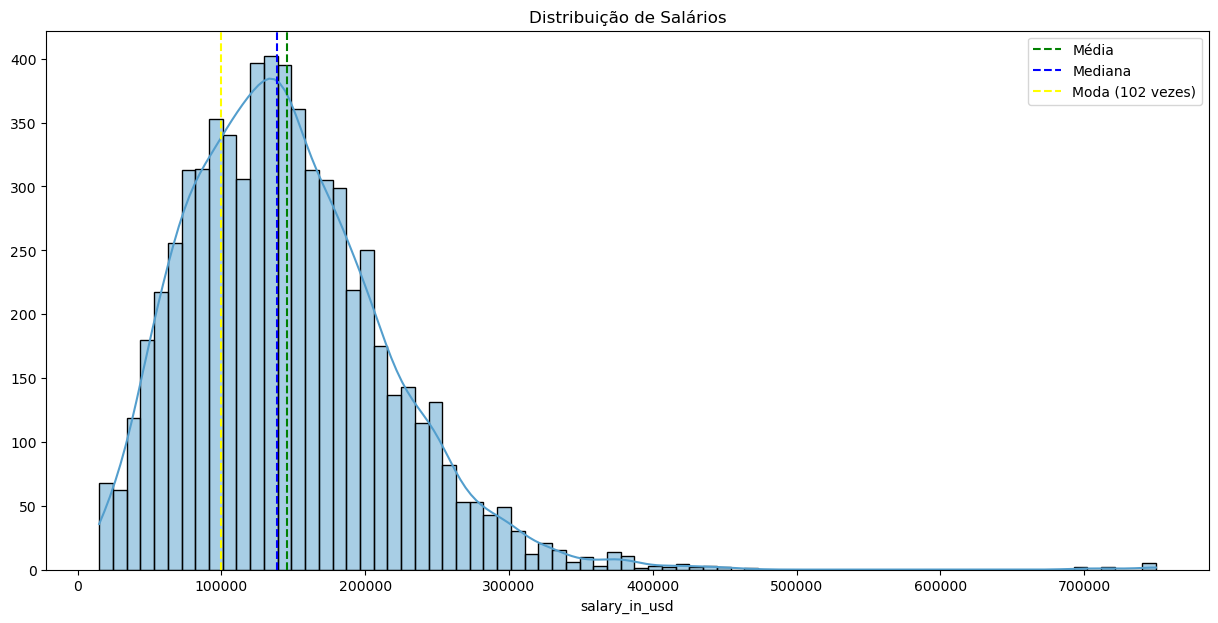

In [38]:
# paleta de cor
paleta = sns.color_palette("Blues")

# configurações do gráfico
fig, _ = plt.subplots(figsize=(15, 7))

# linha de densidade de probabilidade
sns.histplot(data=df, x='salary_in_usd', kde=True, color=paleta[-3])

# linhas de média e mediana
plt.axvline(df['salary_in_usd'].mean(), color='green', linestyle='--', label='Média')
plt.axvline(df['salary_in_usd'].median(), color='blue', linestyle='--', label='Mediana')

# moda
mode_result = mode(df['salary_in_usd'])
mode_salary = mode_result.mode
mode_count = mode_result.count

# linha para moda
plt.axvline(mode_salary, color='yellow', linestyle='--', label=f'Moda ({mode_count} vezes)')

plt.xlabel('salary_in_usd')
plt.ylabel('')
plt.title('Distribuição de Salários')
plt.legend()
plt.show()

De fato a média e mediana são muito próximas. Apesar de existir alguns valores outliers, os dados estão bem distrubídos, realmente está com "cara de distribuição de salários".

A partir desses tratamentos e análises iniciais podemos seguir com exportação do arquivo e demais análises no Excel.

In [39]:
df.to_excel('Data Science Salaries 2024 - Tratado.xlsx', index=False)

Seguimos para as análises e visualizações no Excel.